<a href="https://colab.research.google.com/github/ZackMaster-16/Plagiarism-checker-ai/blob/main/arya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre-processing

In [82]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
# 1. Unzip dataset
zip_path = 'archive.zip'
extract_dir = 'data'
os.makedirs(extract_dir, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_dir)

In [84]:
# 2. Load the SNLI train file
file_path = os.path.join(extract_dir, 'train_snli.txt')
df = pd.read_csv(file_path, sep='\t', header=None, names=['sentence1', 'sentence2', 'label'])

In [85]:
# 3. Initial inspection
print("Original shape:", df.shape)
print(df.head())


Original shape: (367373, 3)
                                           sentence1  \
0  A person on a horse jumps over a broken down a...   
1  A person on a horse jumps over a broken down a...   
2              Children smiling and waving at camera   
3              Children smiling and waving at camera   
4  A boy is jumping on skateboard in the middle o...   

                                       sentence2  label  
0  A person is at a diner, ordering an omelette.      0  
1              A person is outdoors, on a horse.      1  
2                     There are children present      1  
3                          The kids are frowning      0  
4              The boy skates down the sidewalk.      0  


In [86]:
# 4. Drop rows with missing values
df_clean = df.dropna().copy()
print("After dropping NAs:", df_clean.shape)

After dropping NAs: (367369, 3)


In [87]:
# 5. Add sentence-length features
df_clean['s1_len'] = df_clean['sentence1'].str.split().apply(len)
df_clean['s2_len'] = df_clean['sentence2'].str.split().apply(len)

In [88]:

# 6. Preview cleaned data
print(df_clean[['sentence1','s1_len','sentence2','s2_len','label']].head())

                                           sentence1  s1_len  \
0  A person on a horse jumps over a broken down a...      11   
1  A person on a horse jumps over a broken down a...      11   
2              Children smiling and waving at camera       6   
3              Children smiling and waving at camera       6   
4  A boy is jumping on skateboard in the middle o...      13   

                                       sentence2  s2_len  label  
0  A person is at a diner, ordering an omelette.       9      0  
1              A person is outdoors, on a horse.       7      1  
2                     There are children present       4      1  
3                          The kids are frowning       4      0  
4              The boy skates down the sidewalk.       6      0  


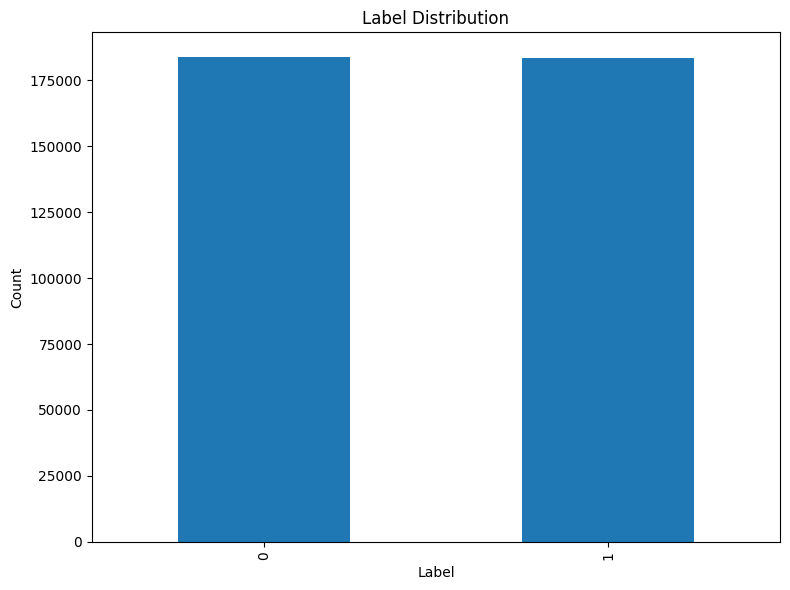

In [89]:
# 7. Plot label distribution
plt.figure(figsize=(8,6))
df_clean['label'].value_counts().sort_index().plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


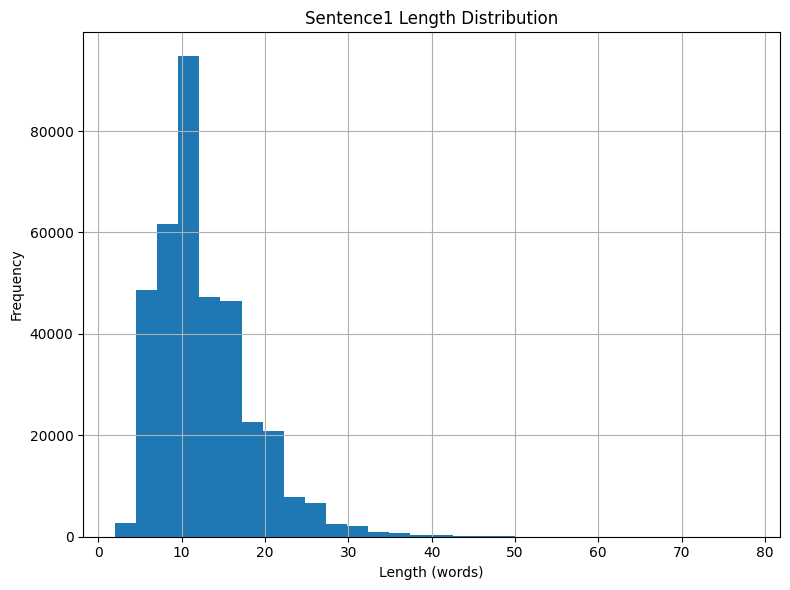

In [90]:
# 8. Plot Sentence1 length distribution
plt.figure(figsize=(8,6))
df_clean['s1_len'].hist(bins=30)
plt.title('Sentence1 Length Distribution')
plt.xlabel('Length (words)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

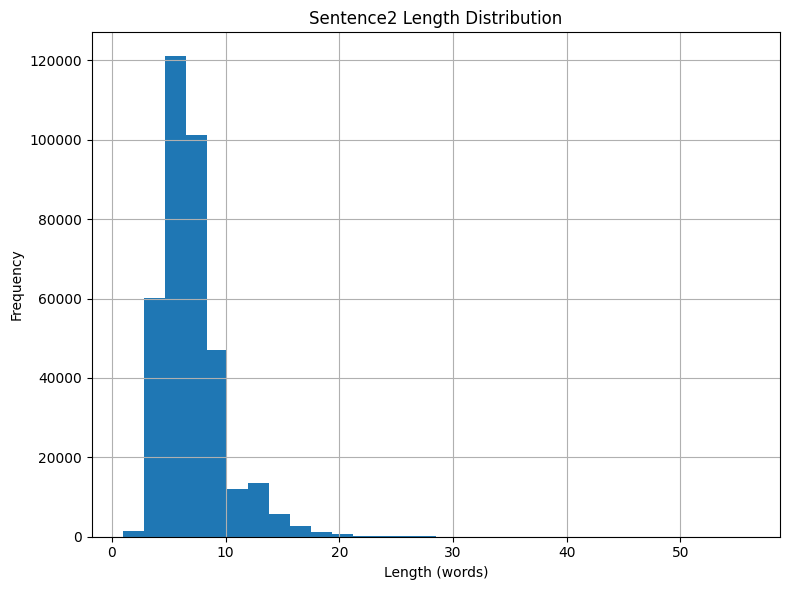

In [91]:
# 9. Plot Sentence2 length distribution
plt.figure(figsize=(8,6))
df_clean['s2_len'].hist(bins=30)
plt.title('Sentence2 Length Distribution')
plt.xlabel('Length (words)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Model Training

In [92]:
# Import necessary libraries
import zipfile  # For working with zip files
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # To split data into train/test sets
from sklearn.feature_extraction.text import TfidfVectorizer  # To convert text to numerical features
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.metrics import accuracy_score  # To calculate model accuracy

In [93]:
# Unzip and load the data
zip_path = 'archive.zip'
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open('train_snli.txt') as f:
        df = pd.read_csv(f, sep='\t', header=None, names=['sentence1', 'sentence2', 'label'])

In [94]:
# Basic data cleaning
df = df.dropna()
df['sentence1'] = df['sentence1'].str.lower().str.replace(r'[^\w\s]', '', regex=True)
df['sentence2'] = df['sentence2'].str.lower().str.replace(r'[^\w\s]', '', regex=True)
df['text'] = df['sentence1'] + ' ' + df['sentence2']

In [95]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)


In [96]:
# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)


In [97]:
# Define classifiers
from sklearn.svm import LinearSVC

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM (Linear Kernel)': LinearSVC(),  # Faster than SVC
    'Multinomial NB': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42)
}

In [98]:
# Train and evaluate
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    preds = clf.predict(X_test_tfidf)
    results[name] = accuracy_score(y_test, preds)

In [99]:

# Present results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy']).sort_values(by='Accuracy', ascending=False)
# import ace_tools as tools;
# tools.display_dataframe_to_user(name="Model Accuracies", dataframe=results_df)
print(results_df)

                     Accuracy
SVM (Linear Kernel)  0.716117
Logistic Regression  0.713109
Random Forest        0.677056
Multinomial NB       0.664875
Decision Tree        0.632509


In [100]:
# Print best model
best_model = results_df.index[0]
best_acc = results_df.iloc[0, 0]
print(f"Best model: {best_model} with accuracy {best_acc:.4f}")

Best model: SVM (Linear Kernel) with accuracy 0.7161


In [101]:
# prompt: Check plagarism on Training.txt

import pandas as pd
# Install required library if not already present
!pip install -q scikit-learn

from sklearn.metrics.pairwise import cosine_similarity

# Function to check plagiarism
# This function will calculate similarity scores between the input text and a corpus
# and predict the label (if a classifier is provided).
# For a basic plagiarism check, we'll focus on the similarity scores.
def check_plagiarism(text_to_check, corpus_texts, vectorizer, model=None, classifiers=None):
    """
    Checks for plagiarism of a text against a corpus.

    Args:
        text_to_check (str): The text to check for plagiarism.
        corpus_texts (list): A list of texts to check against.
        vectorizer: A fitted TfidfVectorizer or similar text vectorizer.
        model (str, optional): The name of the trained model to use for prediction.
                               Defaults to None.
        classifiers (dict, optional): A dictionary of trained classifiers.
                                      Required if model is specified. Defaults to None.

    Returns:
        tuple: A tuple containing:
               - similarity_scores (list): Cosine similarity scores between
                                           text_to_check and each text in corpus_texts.
               - predicted_label (str or None): The predicted label from the model,
                                                or None if no model is provided.
    """
    # Vectorize the text to check and the corpus texts
    text_to_check_tfidf = vectorizer.transform([text_to_check])
    corpus_tfidf = vectorizer.transform(corpus_texts)

    # Calculate cosine similarity
    similarity_scores = cosine_similarity(text_to_check_tfidf, corpus_tfidf)[0]

    predicted_label = None
    if model and classifiers and model in classifiers:
        # Reshape for prediction if needed (e.g., if only one sample)
        predicted_label = classifiers[model].predict(text_to_check_tfidf)
        # If the prediction is an array, take the first element
        if isinstance(predicted_label, (list, tuple, pd.Series)):
          predicted_label = predicted_label[0]


    return similarity_scores, predicted_label

# Read the content of Training.txt
try:
    with open('Ref.txt', 'r') as f:
        training_text = f.read()
except FileNotFoundError:
    print("Error: Training.txt not found. Please make sure the file exists.")
    # Exit or handle the error appropriately if the file is crucial
    # For this example, we will stop execution here if the file is missing.
    exit()


# Ensure the 'text' column exists in df before accessing it
# This part assumes that the preceding code block that creates 'df' and
# the 'text' column has been executed successfully.
if 'text' not in df.columns:
    print("Warning: 'text' column not found in DataFrame. Creating it.")
    # You might need to load the data and perform necessary steps again
    # if the preceding code didn't run.
    # For simplicity, we'll try to create it assuming sentence1 and sentence2 exist.
    if 'sentence1' in df.columns and 'sentence2' in df.columns:
      df['text'] = df['sentence1'].astype(str) + ' ' + df['sentence2'].astype(str)
    else:
      print("Error: Cannot create 'text' column as 'sentence1' or 'sentence2' are missing.")
      # Exit or handle the error
      exit()


# Create a corpus from a sample of the training data (or any other relevant corpus)
# For demonstration, let's use the first 100 sentences from the original training data as corpus.
corpus_texts = df['text'].tolist()[:100]

# Check for plagiarism
# Ensure 'vectorizer', 'best_model', and 'classifiers' are defined from previous code
# If not, you would need to run the model training part of the code first.
# Assuming they are defined:
if 'vectorizer' in locals() and 'best_model' in locals() and 'classifiers' in locals():
    similarity_scores, predicted_label = check_plagiarism(
        training_text, corpus_texts, vectorizer, best_model, classifiers
    )

    print(f"\nSimilarity scores with corpus documents (Training.txt vs sample corpus): {similarity_scores}")
    print(f"Predicted label for Training.txt (using best model): {predicted_label}")

    # Analyze the similarity_scores to identify potential plagiarism.
    plagiarism_threshold = 0.7 # Example threshold - adjust as needed

    print("\nPotential plagiarism alerts (Training.txt vs sample corpus):")
    found_plagiarism = False
    for i, score in enumerate(similarity_scores):
        # Check for significant similarity (e.g., score > threshold)
        # You might also consider comparing against the mean/median similarity of random texts
        if score > plagiarism_threshold:
            print(f"  Training.txt is highly similar to corpus document {i+1} with score: {score:.4f}")
            found_plagiarism = True

    if not found_plagiarism:
        print("  No significant plagiarism detected based on the defined threshold.")

else:
    print("Vectorizer, best_model, or classifiers not defined. Please run the model training part first.")




Similarity scores with corpus documents (Training.txt vs sample corpus): [0.02110939 0.01700516 0.0673082  0.09263773 0.09631583 0.07355016
 0.0398088  0.0479258  0.02557409 0.05921572 0.05909069 0.01660392
 0.02866085 0.09588018 0.09047969 0.08510132 0.07171528 0.20666787
 0.15255034 0.03799069 0.03547127 0.09179342 0.09501824 0.04741018
 0.071496   0.10847284 0.10439862 0.07037405 0.07338747 0.04542549
 0.0577262  0.13315172 0.08739297 0.17818975 0.16475474 0.07879669
 0.07232394 0.1785043  0.16295953 0.1881242  0.18483481 0.17987778
 0.15454936 0.20639334 0.15740265 0.19725007 0.21934431 0.09028058
 0.11744654 0.09074987 0.07496803 0.08616707 0.08095743 0.09159022
 0.08453832 0.074982   0.10599247 0.08088024 0.09448613 0.18631852
 0.08446051 0.09514424 0.09556293 0.0331907  0.02488913 0.07359183
 0.06460009 0.04306561 0.05604539 0.01851253 0.03022891 0.02815151
 0.02975986 0.07740719 0.09081056 0.01105672 0.01412029 0.06337751
 0.04622408 0.029891   0.0495475  0.02362096 0.06374387